In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [3]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

train_df.head()

id                                               text author
0  id26305  This process, however, afforded me no means of...    EAP
1  id17569  It never once occurred to me that the fumbling...    HPL
2  id11008  In his left hand was a gold snuff box, from wh...    EAP
3  id27763  How lovely is spring As we looked from Windsor...    MWS
4  id12958  Finding nothing else, not even gold, the Super...    HPL

In [4]:
print("EAP - Edgar Allan Poe")
print("HPL - H.P. Lovecraft")
print("MWS - Mary Wollstonecraft Shelley")

EAP - Edgar Allan Poe
HPL - H.P. Lovecraft
MWS - Mary Wollstonecraft Shelley


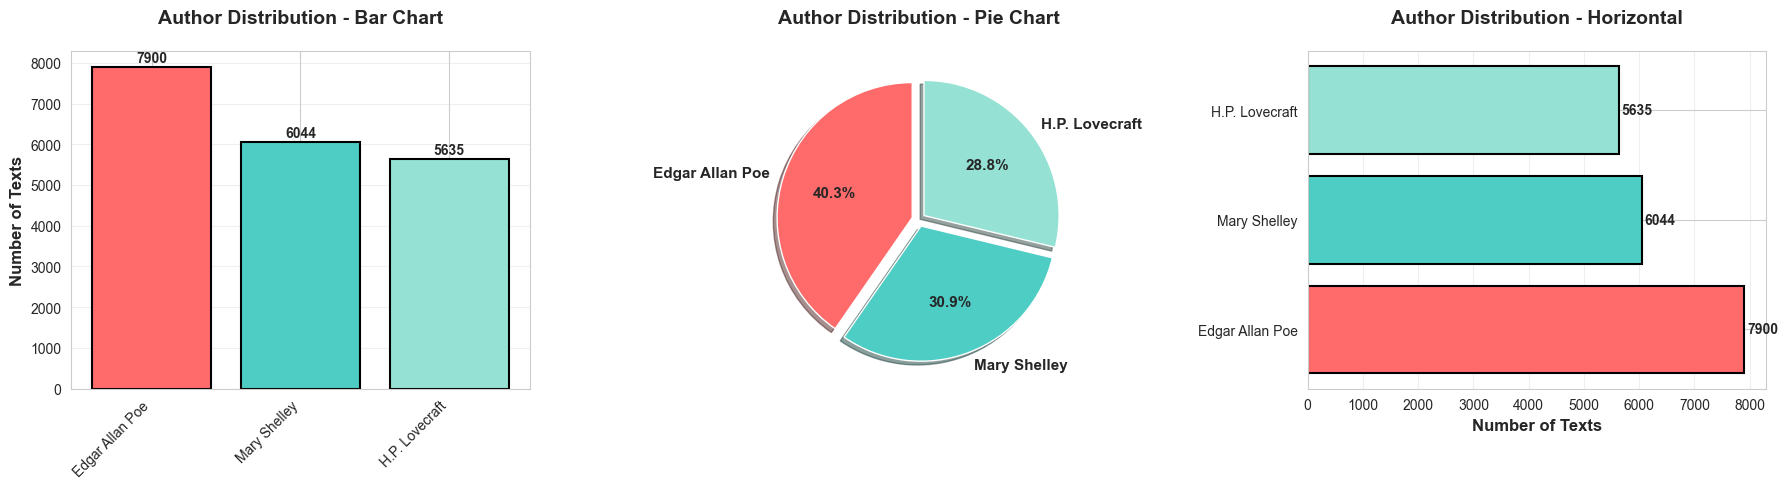

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

author_names = {'EAP': 'Edgar Allan Poe', 'HPL': 'H.P. Lovecraft', 'MWS': 'Mary Shelley'}
colors = ['#FF6B6B', '#4ECDC4', '#95E1D3']

# 1. Bar plot
author_counts = train_df['author'].value_counts()
axes[0].bar(range(len(author_counts)), author_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_xticks(range(len(author_counts)))
axes[0].set_xticklabels([author_names[a] for a in author_counts.index], rotation=45, ha='right')
axes[0].set_ylabel('Number of Texts', fontsize=12, fontweight='bold')
axes[0].set_title('Author Distribution - Bar Chart', fontsize=14, fontweight='bold', pad=20)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(author_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# 2. Pie chart
explode = (0.05, 0.05, 0.05)
axes[1].pie(author_counts.values, labels=[author_names[a] for a in author_counts.index], 
            autopct='%1.1f%%', startangle=90, colors=colors, explode=explode,
            shadow=True, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Author Distribution - Pie Chart', fontsize=14, fontweight='bold', pad=20)

# 3. Horizontal bar plot
axes[2].barh(range(len(author_counts)), author_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[2].set_yticks(range(len(author_counts)))
axes[2].set_yticklabels([author_names[a] for a in author_counts.index])
axes[2].set_xlabel('Number of Texts', fontsize=12, fontweight='bold')
axes[2].set_title('Author Distribution - Horizontal', fontsize=14, fontweight='bold', pad=20)
axes[2].grid(axis='x', alpha=0.3)
for i, v in enumerate(author_counts.values):
    axes[2].text(v + 50, i, str(v), ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Text Length Analysis

In [6]:
train_df['text_length'] = train_df['text'].apply(len)
train_df['word_count'] = train_df['text'].apply(lambda x: len(str(x).split()))
train_df['avg_word_length'] = train_df['text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))

train_df[['text_length', 'word_count', 'avg_word_length']].describe()

text_length    word_count  avg_word_length
count  19579.000000  19579.000000     19579.000000
mean     149.057408     26.730477         4.624827
std      106.800189     19.048353         0.589194
min       21.000000      2.000000         2.000000
25%       81.000000     15.000000         4.250000
50%      128.000000     23.000000         4.590909
75%      191.000000     34.000000         4.952381
max     4663.000000    861.000000        11.000000

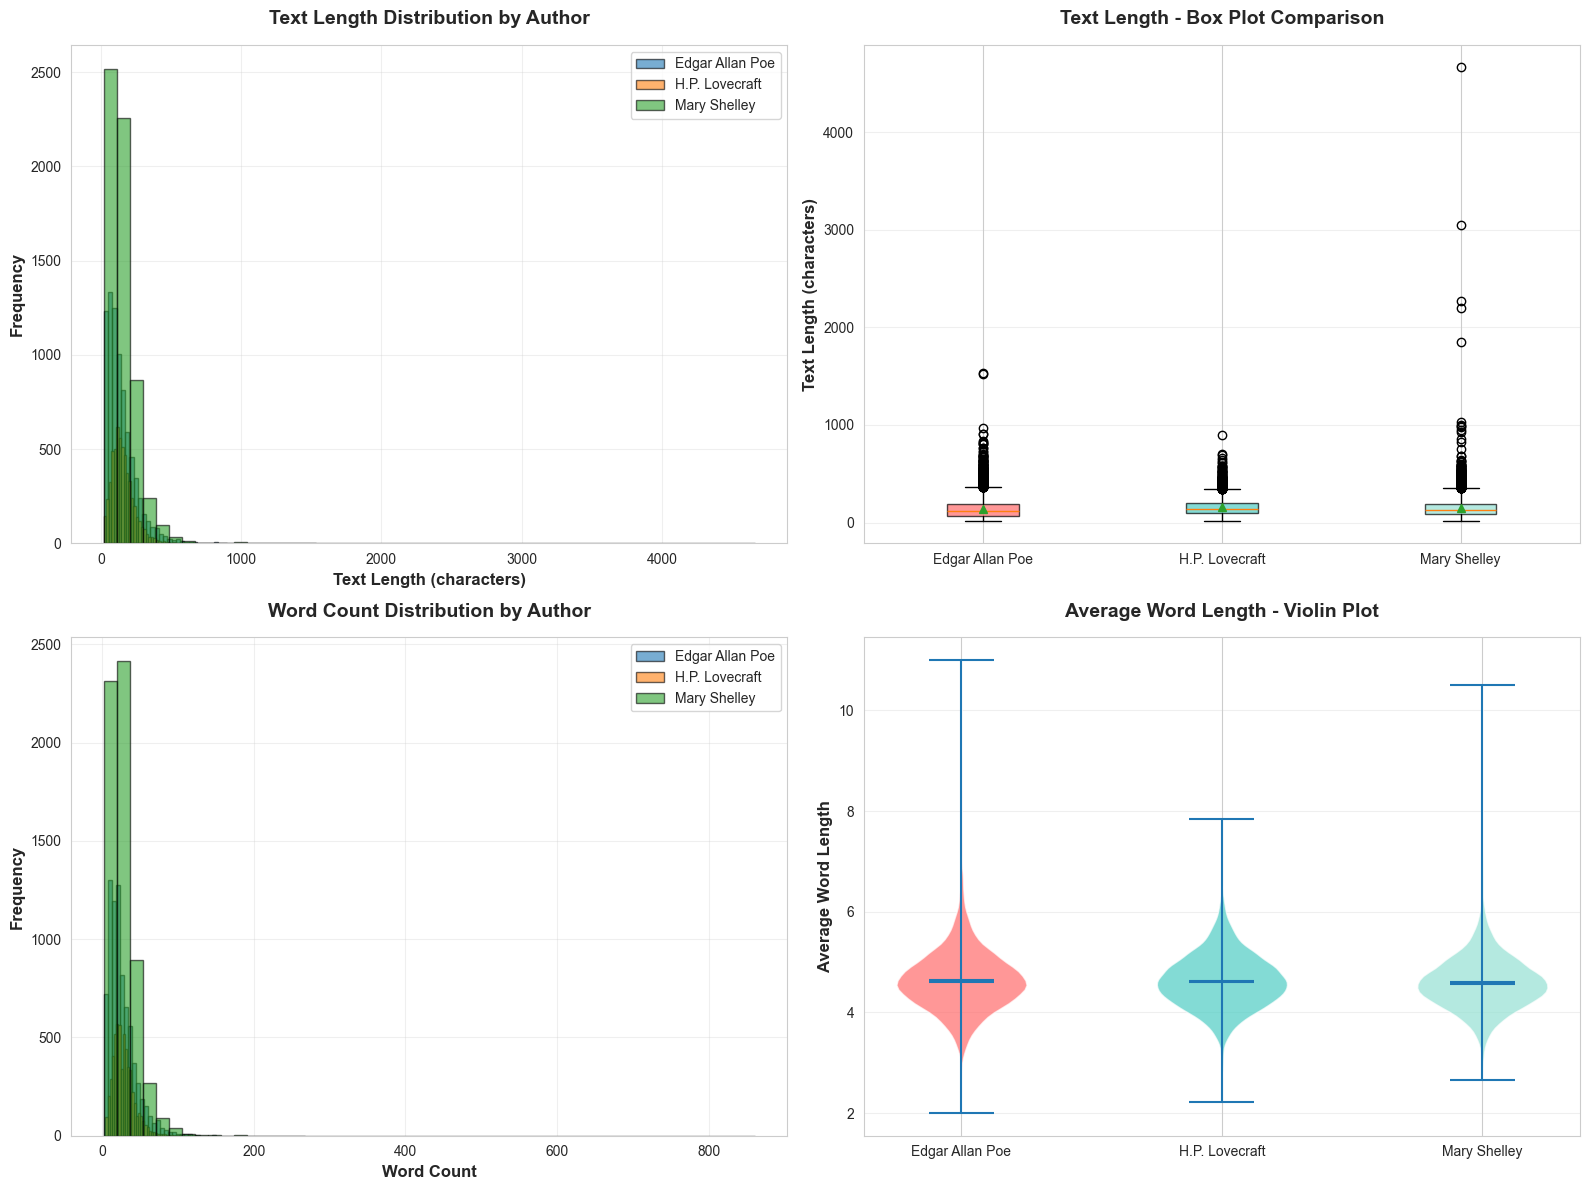

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution of text length by author
for author in train_df['author'].unique():
    author_data = train_df[train_df['author'] == author]['text_length']
    axes[0, 0].hist(author_data, bins=50, alpha=0.6, label=author_names[author], edgecolor='black')
axes[0, 0].set_xlabel('Text Length (characters)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Text Length Distribution by Author', fontsize=14, fontweight='bold', pad=15)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Box plot for text length
data_to_plot = [train_df[train_df['author'] == author]['text_length'] for author in train_df['author'].unique()]
bp = axes[0, 1].boxplot(data_to_plot, labels=[author_names[a] for a in train_df['author'].unique()],
                         patch_artist=True, showmeans=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0, 1].set_ylabel('Text Length (characters)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Text Length - Box Plot Comparison', fontsize=14, fontweight='bold', pad=15)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Word count distribution
for author in train_df['author'].unique():
    author_data = train_df[train_df['author'] == author]['word_count']
    axes[1, 0].hist(author_data, bins=50, alpha=0.6, label=author_names[author], edgecolor='black')
axes[1, 0].set_xlabel('Word Count', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Word Count Distribution by Author', fontsize=14, fontweight='bold', pad=15)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Violin plot for average word length
data_for_violin = [train_df[train_df['author'] == author]['avg_word_length'] for author in train_df['author'].unique()]
parts = axes[1, 1].violinplot(data_for_violin, positions=range(len(train_df['author'].unique())),
                               showmeans=True, showmedians=True)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)
axes[1, 1].set_xticks(range(len(train_df['author'].unique())))
axes[1, 1].set_xticklabels([author_names[a] for a in train_df['author'].unique()])
axes[1, 1].set_ylabel('Average Word Length', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Average Word Length - Violin Plot', fontsize=14, fontweight='bold', pad=15)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Word Clouds for Each Author

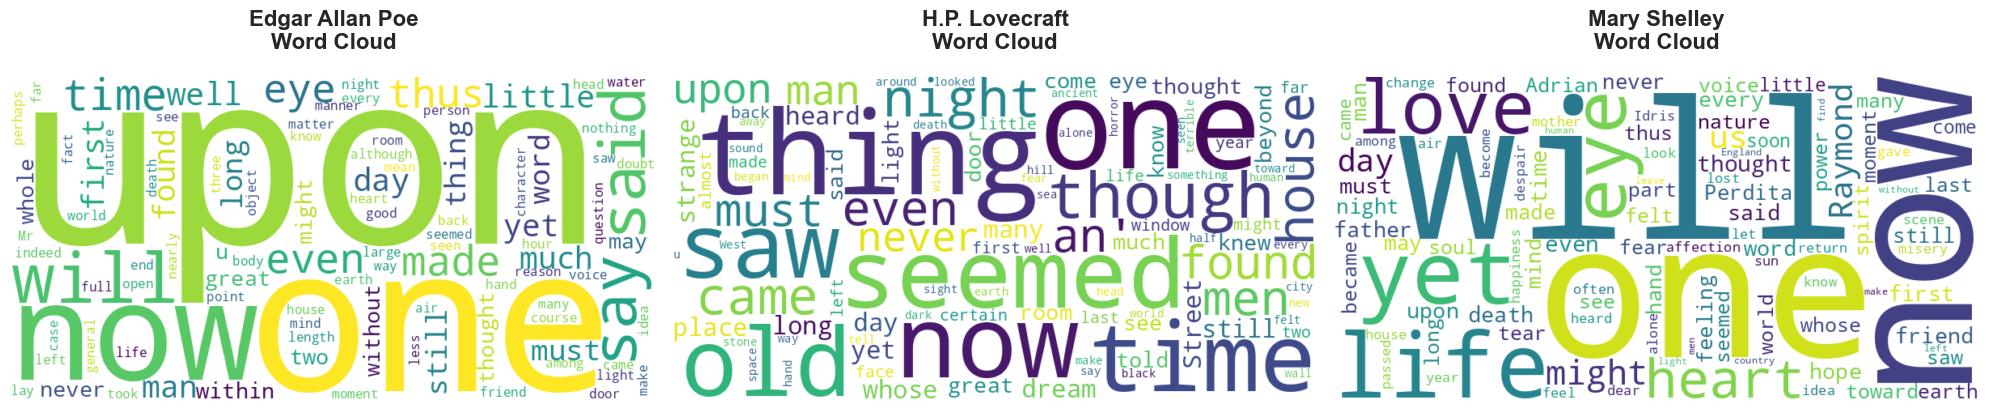

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, author in enumerate(train_df['author'].unique()):
    # Combine all text from this author
    text = ' '.join(train_df[train_df['author'] == author]['text'].values)
    
    wordcloud = WordCloud(width=800, height=400, 
                          background_color='white',
                          colormap='viridis',
                          max_words=100,
                          contour_width=2,
                          contour_color=colors[idx]).generate(text)
    
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis('off')
    axes[idx].set_title(f'{author_names[author]}\nWord Cloud', 
                       fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

## Interactive Plotly Visualizations

In [10]:
train_df['author_name'] = train_df['author'].map(author_names)

fig = px.scatter(train_df, x='word_count', y='text_length', 
                 color='author_name', 
                 hover_data=['text'],
                 title='Word Count vs Text Length by Author',
                 labels={'word_count': 'Word Count', 
                        'text_length': 'Text Length (characters)',
                        'author_name': 'Author'},
                 color_discrete_map={'Edgar Allan Poe': '#FF6B6B',
                                    'H.P. Lovecraft': '#4ECDC4',
                                    'Mary Shelley': '#95E1D3'})

fig.update_layout(title_font_size=20, title_font_family='Arial Black',
                 height=600, hovermode='closest')
fig.show()

In [14]:
fig = px.box(train_df, x='author_name', y='text_length', 
             color='author_name',
             title='Text Length Distribution by Author',
             labels={'author_name': 'Author', 'text_length': 'Text Length (characters)'},
             color_discrete_map={'Edgar Allan Poe': '#FF6B6B',
                                'H.P. Lovecraft': '#4ECDC4',
                                'Mary Shelley': '#95E1D3'})

fig.update_layout(title_font_size=20, title_font_family='Arial Black',
                 height=600, showlegend=False)
fig.show()

In [13]:
fig = px.violin(train_df, x='author_name', y='avg_word_length',
                color='author_name', box=True, points='all',
                title='Average Word Length Distribution by Author',
                labels={'author_name': 'Author', 'avg_word_length': 'Average Word Length'},
                color_discrete_map={'Edgar Allan Poe': '#FF6B6B',
                                   'H.P. Lovecraft': '#4ECDC4',
                                   'Mary Shelley': '#95E1D3'})

fig.update_layout(title_font_size=20, title_font_family='Arial Black',
                 height=600, showlegend=False)
fig.show()

## Character and Punctuation Analysis

In [ ]:
train_df['uppercase_count'] = train_df['text'].apply(lambda x: sum(1 for c in str(x) if c.isupper()))
train_df['punctuation_count'] = train_df['text'].apply(lambda x: sum(1 for c in str(x) if c in '.,!?;:'))
train_df['digit_count'] = train_df['text'].apply(lambda x: sum(1 for c in str(x) if c.isdigit()))

summary_stats = train_df.groupby('author_name').agg({
    'text_length': 'mean',
    'word_count': 'mean',
    'avg_word_length': 'mean',
    'uppercase_count': 'mean',
    'punctuation_count': 'mean',
    'digit_count': 'mean'
}).round(2)

summary_stats

text_length  word_count  avg_word_length  uppercase_count  \
author_name                                                                  
Edgar Allan Poe       142.23       25.44             4.64             2.21   
H.P. Lovecraft        155.84       27.80             4.63             2.44   
Mary Shelley          151.66       27.42             4.60             2.20   

                 punctuation_count  digit_count  
author_name                                      
Edgar Allan Poe               3.55          0.0  
H.P. Lovecraft                2.81          0.0  
Mary Shelley                  3.51          0.0

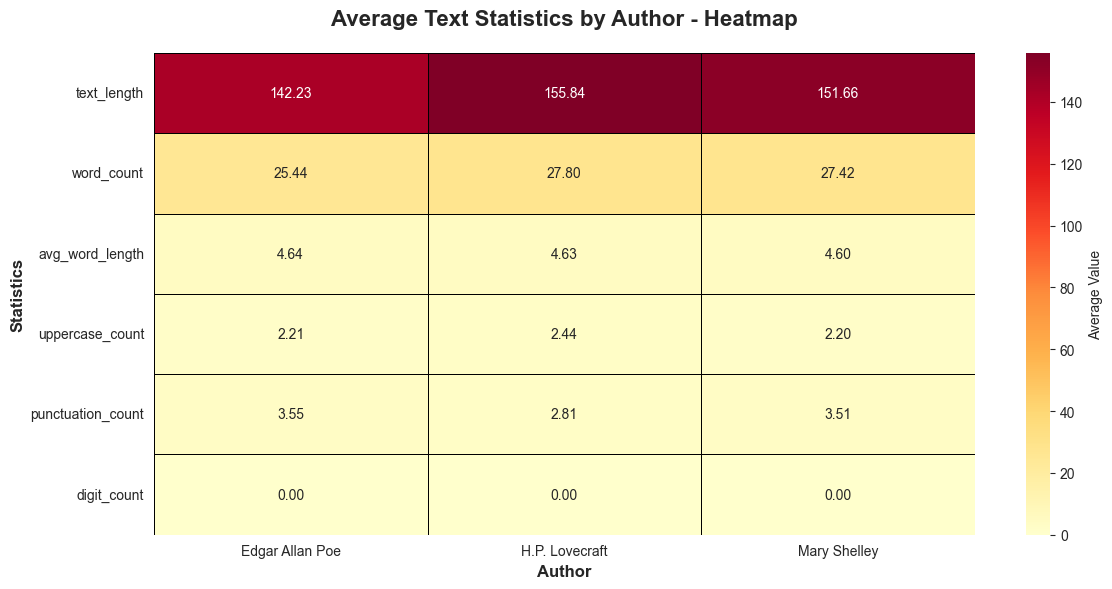

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

heatmap_data = summary_stats.T

sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Average Value'}, linewidths=0.5, linecolor='black',
            ax=ax)

ax.set_title('Average Text Statistics by Author - Heatmap', 
            fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Author', fontsize=12, fontweight='bold')
ax.set_ylabel('Statistics', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

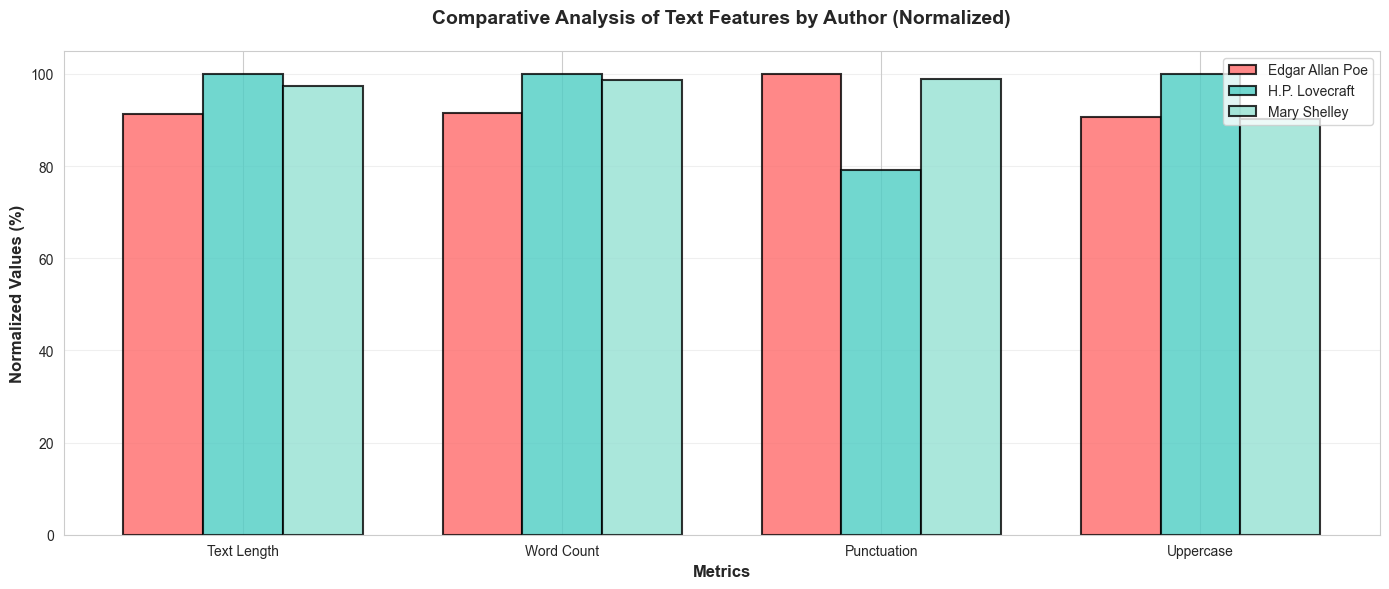

In [18]:
fig, ax = plt.subplots(figsize=(14, 6))

metrics = ['text_length', 'word_count', 'punctuation_count', 'uppercase_count']
x = np.arange(len(metrics))
width = 0.25

for i, author in enumerate(train_df['author_name'].unique()):
    values = [summary_stats.loc[author, metric] for metric in metrics]
    # Normalize values for better comparison
    normalized_values = [v / max(summary_stats[metric]) * 100 for v, metric in zip(values, metrics)]
    ax.bar(x + i * width, normalized_values, width, label=author, 
           color=colors[i], edgecolor='black', linewidth=1.5, alpha=0.8)

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Normalized Values (%)', fontsize=12, fontweight='bold')
ax.set_title('Comparative Analysis of Text Features by Author (Normalized)', 
            fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x + width)
ax.set_xticklabels(['Text Length', 'Word Count', 'Punctuation', 'Uppercase'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Advanced Statistical Visualizations

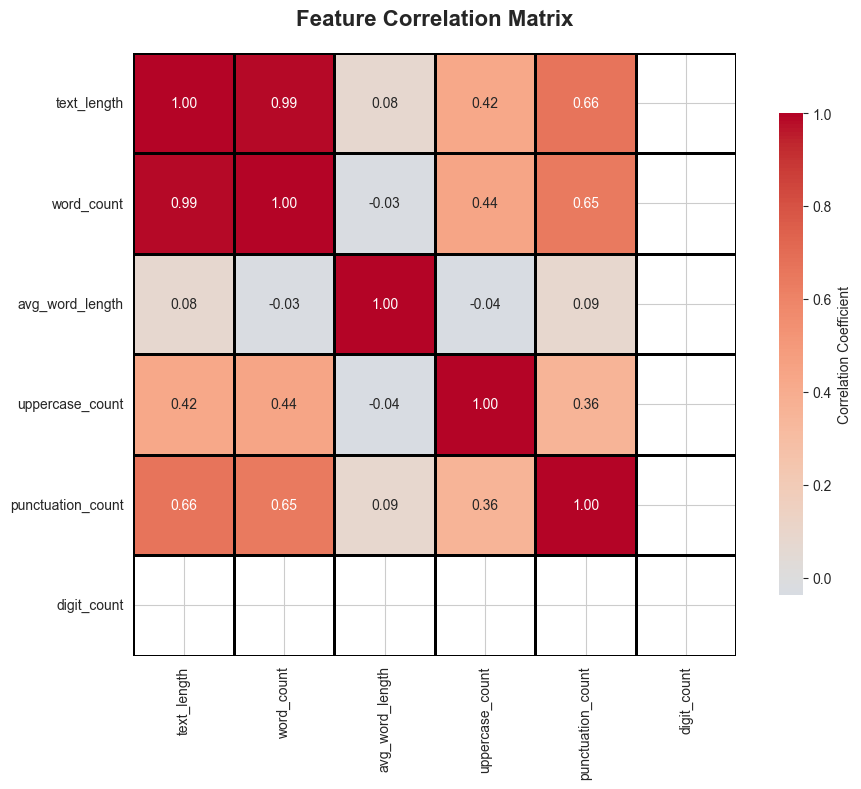

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))

# numerical columns
numerical_cols = ['text_length', 'word_count', 'avg_word_length', 
                  'uppercase_count', 'punctuation_count', 'digit_count']
correlation_matrix = train_df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, linecolor='black',
            cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8},
            ax=ax)

ax.set_title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

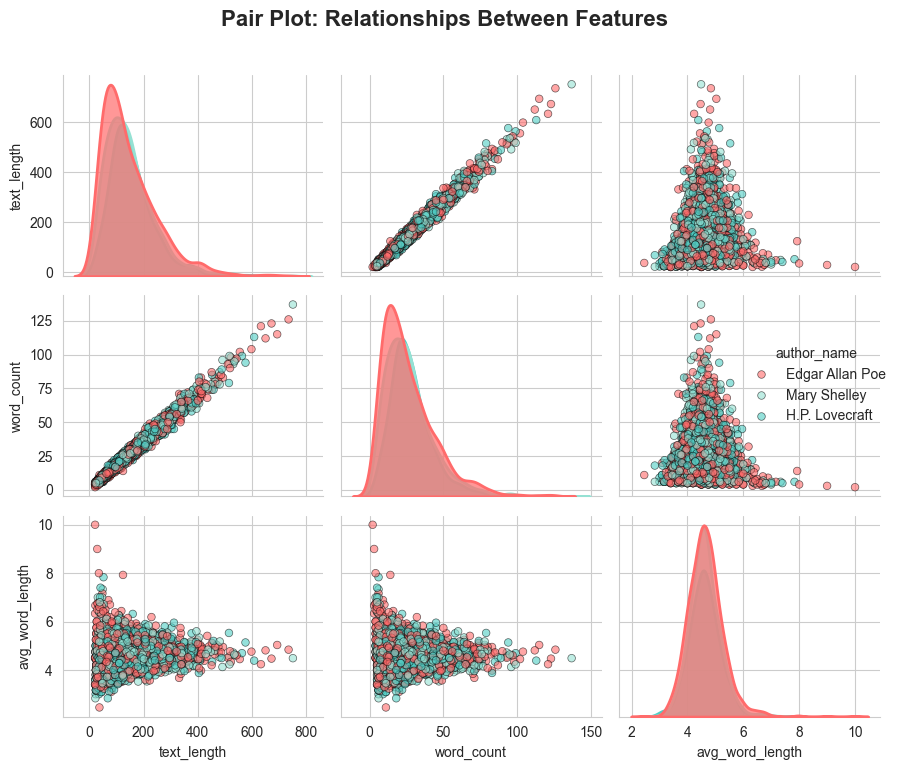

In [20]:
sample_df = train_df.sample(n=min(3000, len(train_df)), random_state=42)

pairplot = sns.pairplot(sample_df[['text_length', 'word_count', 'avg_word_length', 'author_name']], 
                        hue='author_name', 
                        palette={'Edgar Allan Poe': '#FF6B6B',
                                'H.P. Lovecraft': '#4ECDC4',
                                'Mary Shelley': '#95E1D3'},
                        diag_kind='kde',
                        plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'black', 'linewidth': 0.5},
                        diag_kws={'alpha': 0.7, 'linewidth': 2})

pairplot.fig.suptitle('Pair Plot: Relationships Between Features', 
                     y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 3D Interactive Visualization

In [21]:
fig = px.scatter_3d(sample_df, x='text_length', y='word_count', z='avg_word_length',
                    color='author_name', 
                    title='3D Visualization: Text Features by Author',
                    labels={'text_length': 'Text Length',
                           'word_count': 'Word Count',
                           'avg_word_length': 'Avg Word Length',
                           'author_name': 'Author'},
                    color_discrete_map={'Edgar Allan Poe': '#FF6B6B',
                                       'H.P. Lovecraft': '#4ECDC4',
                                       'Mary Shelley': '#95E1D3'},
                    hover_data=['text'])

fig.update_traces(marker=dict(size=5, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(title_font_size=20, title_font_family='Arial Black',
                 height=700, scene=dict(
                     xaxis_title='Text Length',
                     yaxis_title='Word Count',
                     zaxis_title='Avg Word Length'))
fig.show()